The New Build Premium: A UK Housing Market Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Exploratory Data Analysis

In [2]:
#Average Price of Houses

data = pd.read_csv('./Data/Average-price-seasonally-adjusted-2025-05.csv')


In [3]:
data.head(-5)

,Date,Region_Name,Area_Code,Average_Price_SA
0,1995-01-01,England,E92000001,50619
1,1995-01-01,Wales,W92000004,40567
2,1995-01-01,London,E12000007,79601
3,1995-01-01,East of England,E12000006,56587
4,1995-01-01,North West,E12000002,41392
...,...,...,...,...
5129,2025-05-01,Yorkshire and The Humber,E12000003,204849
5130,2025-05-01,East Midlands,E12000004,243202
5131,2025-05-01,West Midlands Region,E12000005,244999
5132,2025-05-01,East of England,E12000006,341018


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3675 entries, 1464 to 5138
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3675 non-null   datetime64[ns]
 1   Region_Name       3675 non-null   object        
 2   Area_Code         3675 non-null   object        
 3   Average_Price_SA  3675 non-null   int64         
 4   Year              3675 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 157.9+ KB


In [5]:
#extract year from date

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year

In [ ]:

data["Average_Price_SA"] = pd.to_numeric(data["Average_Price_SA"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025)]


yearly_avg = (
    data.groupby("Year")["Average_Price_SA"]
         .mean()
         .reset_index(name="AvgPrice_UK")
)

print(yearly_avg)



    Year    AvgPrice_UK
0   2005  148803.177778
1   2006  159276.944444
2   2007  174058.044444
3   2008  167334.816667
4   2009  153165.611111
5   2010  162356.944444
6   2011  160320.194444
7   2012  161916.172222
8   2013  166486.661111
9   2014  180491.250000
10  2015  192366.577778
11  2016  206584.766667
12  2017  215623.905556
13  2018  221558.027778
14  2019  222910.822222
15  2020  229022.050000
16  2021  246089.455556
17  2022  268439.711111
18  2023  268864.722222
19  2024  270071.250000
20  2025  279031.013333


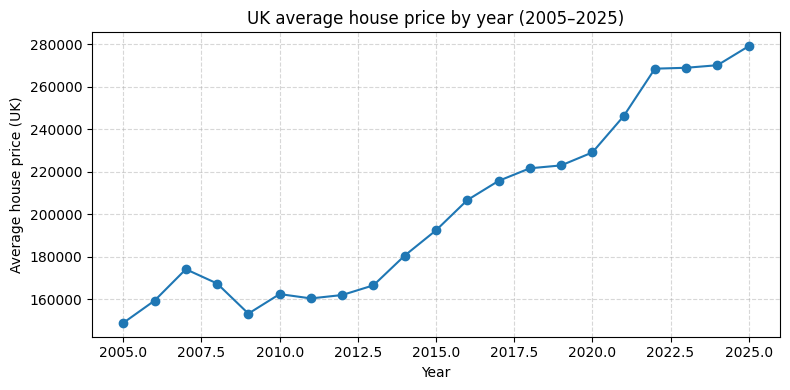

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(yearly_avg["Year"], yearly_avg["AvgPrice_UK"], marker="o")
plt.xlabel("Year")
plt.ylabel("Average house price (UK)")
plt.title("UK average house price by year (2005–2025)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
# % of change in average price year on year
yearly_avg["Pct_Change"] = yearly_avg["AvgPrice_UK"].pct_change() * 100
print(yearly_avg)

    Year    AvgPrice_UK  Pct_Change
0   2005  148803.177778         NaN
1   2006  159276.944444    7.038671
2   2007  174058.044444    9.280125
3   2008  167334.816667   -3.862635
4   2009  153165.611111   -8.467578
5   2010  162356.944444    6.000912
6   2011  160320.194444   -1.254489
7   2012  161916.172222    0.995494
8   2013  166486.661111    2.822750
9   2014  180491.250000    8.411838
10  2015  192366.577778    6.579448
11  2016  206584.766667    7.391195
12  2017  215623.905556    4.375511
13  2018  221558.027778    2.752071
14  2019  222910.822222    0.610582
15  2020  229022.050000    2.741557
16  2021  246089.455556    7.452298
17  2022  268439.711111    9.082167
18  2023  268864.722222    0.158326
19  2024  270071.250000    0.448749
20  2025  279031.013333    3.317555


In [7]:
data.to_csv('test.csv')